In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diamonds.csv')


In [3]:
df.shape


(53940, 11)

In [4]:
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.dtypes


Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

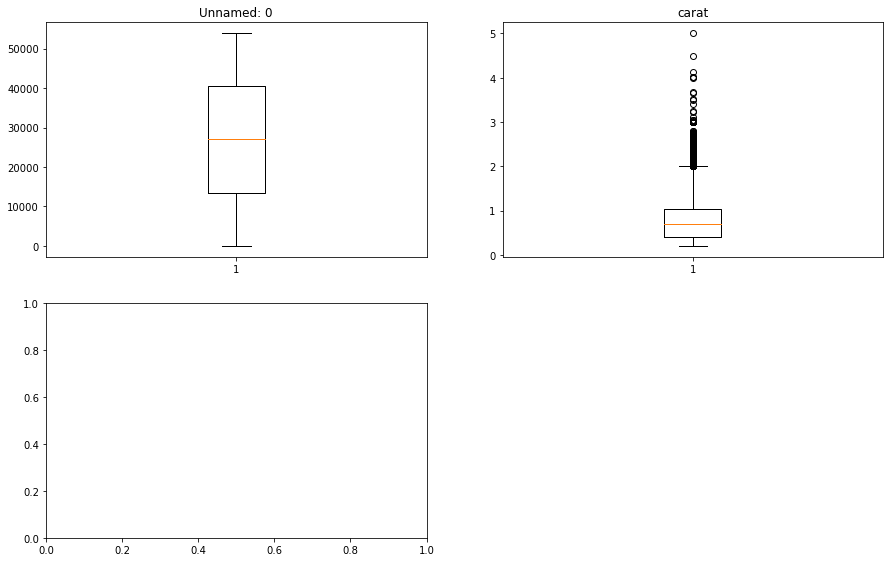

In [7]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(5,2,count)
    plt.boxplot(df[col])
    plt.title(col)
    count +=1
        
plt.show()

In [8]:
df.corr()


,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [9]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [10]:
X.shape


(53940, 10)

In [11]:
y.shape


(53940,)

In [ ]:
y = y.reshape(-1,1)


In [12]:
d1 = pd.get_dummies(df,drop_first= True)
print(d1)


       Unnamed: 0  carat  depth  table  price     x     y     z  cut_Good  \
0               1   0.23   61.5   55.0    326  3.95  3.98  2.43         0   
1               2   0.21   59.8   61.0    326  3.89  3.84  2.31         0   
2               3   0.23   56.9   65.0    327  4.05  4.07  2.31         1   
3               4   0.29   62.4   58.0    334  4.20  4.23  2.63         0   
4               5   0.31   63.3   58.0    335  4.34  4.35  2.75         1   
...           ...    ...    ...    ...    ...   ...   ...   ...       ...   
53935       53936   0.72   60.8   57.0   2757  5.75  5.76  3.50         0   
53936       53937   0.72   63.1   55.0   2757  5.69  5.75  3.61         1   
53937       53938   0.70   62.8   60.0   2757  5.66  5.68  3.56         0   
53938       53939   0.86   61.0   58.0   2757  6.15  6.12  3.74         0   
53939       53940   0.75   62.2   55.0   2757  5.83  5.87  3.64         0   

       cut_Ideal  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  

In [13]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

ValueError: could not convert string to float: 'Ideal'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)